In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Generate sinusoidal data with noise

In [2]:
sinusoid = lambda x: np.sin(2*np.pi*x)
    

In [3]:
size = 25

rng = np.random.RandomState(42)

x_train = rng.uniform(size=size)

y_train = sinusoid(x_train)

x_test = np.linspace(0.0,1.0, 100)

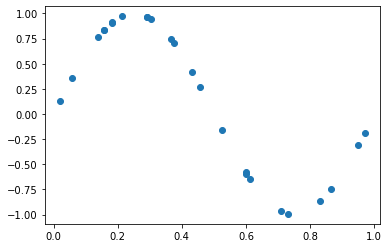

In [4]:
plt.scatter(x_train, y_train);

## Fit by cubic polynomial

In [5]:
order = 3

X_train = np.vander(x_train, order+1 ,increasing=True)
X_test = np.vander(x_test, order+1 ,increasing=True)

## Bayesian Ridge Regression  -- using default values

* alpha_init, default=None

Initial value for alpha (precision of the noise). If not set, alpha_init is 1/Var(y).


* lambda_init, default=None

Initial value for lambda (precision of the weights). If not set, lambda_init is 1.

* compute_score, default=False

If True, compute the log marginal likelihood at each iteration of the optimization.

* fit_intercept, default=True

Whether to calculate the intercept for this model. The intercept is not treated as a probabilistic parameter and thus has no associated variance. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

In [6]:
from sklearn.linear_model import BayesianRidge


bayes = BayesianRidge() # using default values
bayes.fit(X_train, y_train)
y_pred, y_std = bayes.predict(X_test, return_std=True)

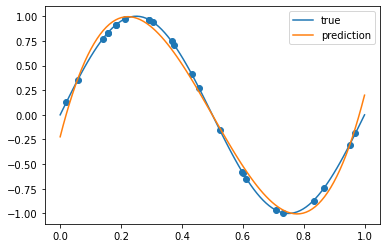

In [9]:
plt.plot(x_test, sinusoid(x_test), label='true')
plt.plot(x_test, y_pred, label='prediction')
plt.scatter(x_train, y_train)
plt.legend();


## Bayesian Ridge Regression 

* fit_intercept = False

* compute_score = True

### regularization parameters : lambda (precision of the weights) and alpha (precision of the noise)

When starting from the default values (alpha_init =  1/Var(y), lambda_init = 1.0), the bias of the resulting curve is large, and the variance is small. 


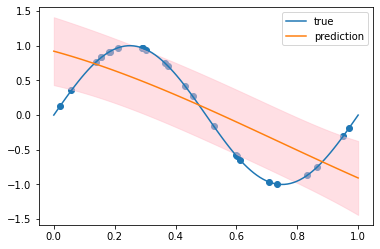

In [13]:
bayes = BayesianRidge(fit_intercept=False, compute_score=True) 
bayes.fit(X_train, y_train)
y_pred, y_std = bayes.predict(X_test, return_std=True)

plt.plot(x_test, sinusoid(x_test), label='true')
plt.plot(x_test, y_pred, label='prediction')
plt.scatter(x_train, y_train)
plt.fill_between(x_test, y_pred-y_std, y_pred+y_std, color='pink', alpha=0.5)
plt.legend();

## Bayesian Ridge Regression 

* fit_intercept = False

* compute_score = True

* alpha_init =  1/Var(y) 

* lambda_init = 1e-3

### regularization parameters : lambda (precision of the weights) and alpha (precision of the noise)

lambda_init should be relatively small (1.e-3) so as to reduce the bias.

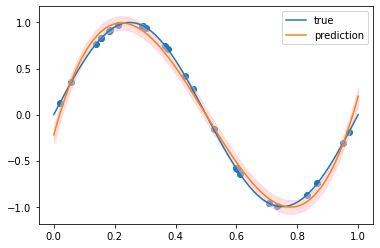

In [19]:
bayes = BayesianRidge(fit_intercept=False, compute_score=True , lambda_init=1e-3) 
bayes.fit(X_train, y_train)
y_pred, y_std = bayes.predict(X_test, return_std=True)

plt.plot(x_test, sinusoid(x_test), label='true')
plt.plot(x_test, y_pred, label='prediction')
plt.scatter(x_train, y_train)
plt.fill_between(x_test, y_pred-y_std, y_pred+y_std, color='pink', alpha=0.5)
plt.legend();